# Elizabeth Daly
# HDip Data Analytics 2020
## Machine Learning & Statistics Project
***

For the module project we must create a web service that uses machine learning to make predictions of wind turbine power output from wind speed values. The web service should respond with predicted power values based on wind speed values sent as HTTP requests. A Dockerfile will be used to build and run the web service in a container. 

The very first thing to do is to import required packages.

In [1]:
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration
Import the **powerproduction** dataset provided and have a look at it.

In [2]:
# File provided as a txt file. I saved it as a csv file.
df = pd.read_csv("data\powerproduction.csv")

# Size?
shape = df.shape
print("Data frame shape", shape, "r,c")

# Check for NaNs, missing values etc
print(df.count())

Data frame shape (500, 2) r,c
speed    500
power    500
dtype: int64


In [3]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The raw data contains a column of wind speed values (in increasing order of wind speed) and a column of associated power values. Looks like the first and last 5 lines contain zeros for power. Is this just a fluke? There's probably a reason for it: one can't generate power with low wind speeds and perhaps one can't operate the turbines at very high wind speeds? Check by printing more of the head of file. 

In [4]:
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [5]:
# Look at some quick descriptive statistics of the numeric data.
print(df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


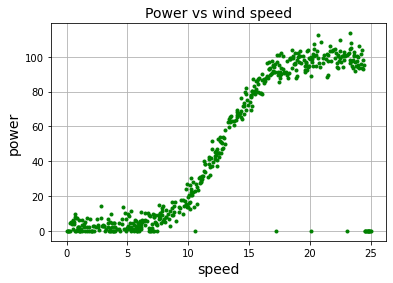

In [6]:
# Try plotting power as a function of wind speed to check for any obvious relationship between them.
plt.plot(df['speed'], df['power'],  '.g')
plt.title('Power vs wind speed', fontsize='14')
plt.xlabel('speed', fontsize='14')
plt.ylabel('power', fontsize='14')
plt.grid()

Clearly there isn't a simple relationship between power and speed. It looks as if little power is generated until some threshold speed is achieved (about 7), then it increases nearly linearly in a range of wind speeds (10 - 15), before saturating above a certain wind speed (about 17). The plot would suggest there is an optimum range of wind speeds for predictable power generation. There are very occasional zero values for power at higher wind speeds - just anomalies or blips in the data I think.

In [ ]:
# Find zero power